In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [4]:
dictionary = pd.read_csv('.\\data\\data-dictionary.csv')
dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
data = pd.read_csv('.\\data\\Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
#обрахування дисперсії (міра розсіяння значень випадкової величини відносно середнього значення розподілу)
data.var()

C:\Users\Nirvana\AppData\Local\Temp\ipykernel_10796\2157988493.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


child_mort    1.626423e+03
exports       7.514183e+02
health        7.545116e+00
imports       5.861042e+02
income        3.716439e+08
inflation     1.117398e+02
life_expec    7.908851e+01
total_fer     2.291734e+00
gdpp          3.359414e+08
dtype: float64

In [7]:
#обрахування коваріації (міра спільної мінливості двох випадкових змінних)
data.cov()

C:\Users\Nirvana\AppData\Local\Temp\ipykernel_10796\728860479.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1626.422713,-351.651128,-22.199943,-124.201982,-4.076360e+05,122.893627,-318.008262,51.801162,-3.570463e+05
exports,-351.651128,751.418298,-8.614534,489.350622,2.730946e+05,-31.090078,77.110598,-13.279671,2.103785e+05
health,-22.199943,-8.614534,7.545116,6.365141,6.861669e+03,-7.415093,5.146808,-0.817828,1.741797e+04
imports,-124.201982,489.350622,6.365141,586.104198,5.712872e+04,-63.208898,11.710284,-5.829066,5.125005e+04
income,-407635.982270,273094.598023,6861.669071,57128.721588,3.716439e+08,-30110.122438,104916.785517,-14645.727927,3.164430e+08
inflation,122.893627,-31.090078,-7.415093,-63.208898,-3.011012e+04,111.739781,-22.533965,5.071509,-4.294042e+04
life_expec,-318.008262,77.110598,5.146808,11.710284,1.049168e+05,-22.533965,79.088507,-10.243585,9.781472e+04
total_fer,51.801162,-13.279671,-0.817828,-5.829066,-1.464573e+04,5.071509,-10.243585,2.291734,-1.262233e+04
gdpp,-357046.306154,210378.470377,17417.971217,51250.050217,3.164430e+08,-42940.421636,97814.722603,-12622.333657,3.359414e+08


C:\Users\Nirvana\AppData\Local\Temp\ipykernel_10796\3672211894.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), annot=True)


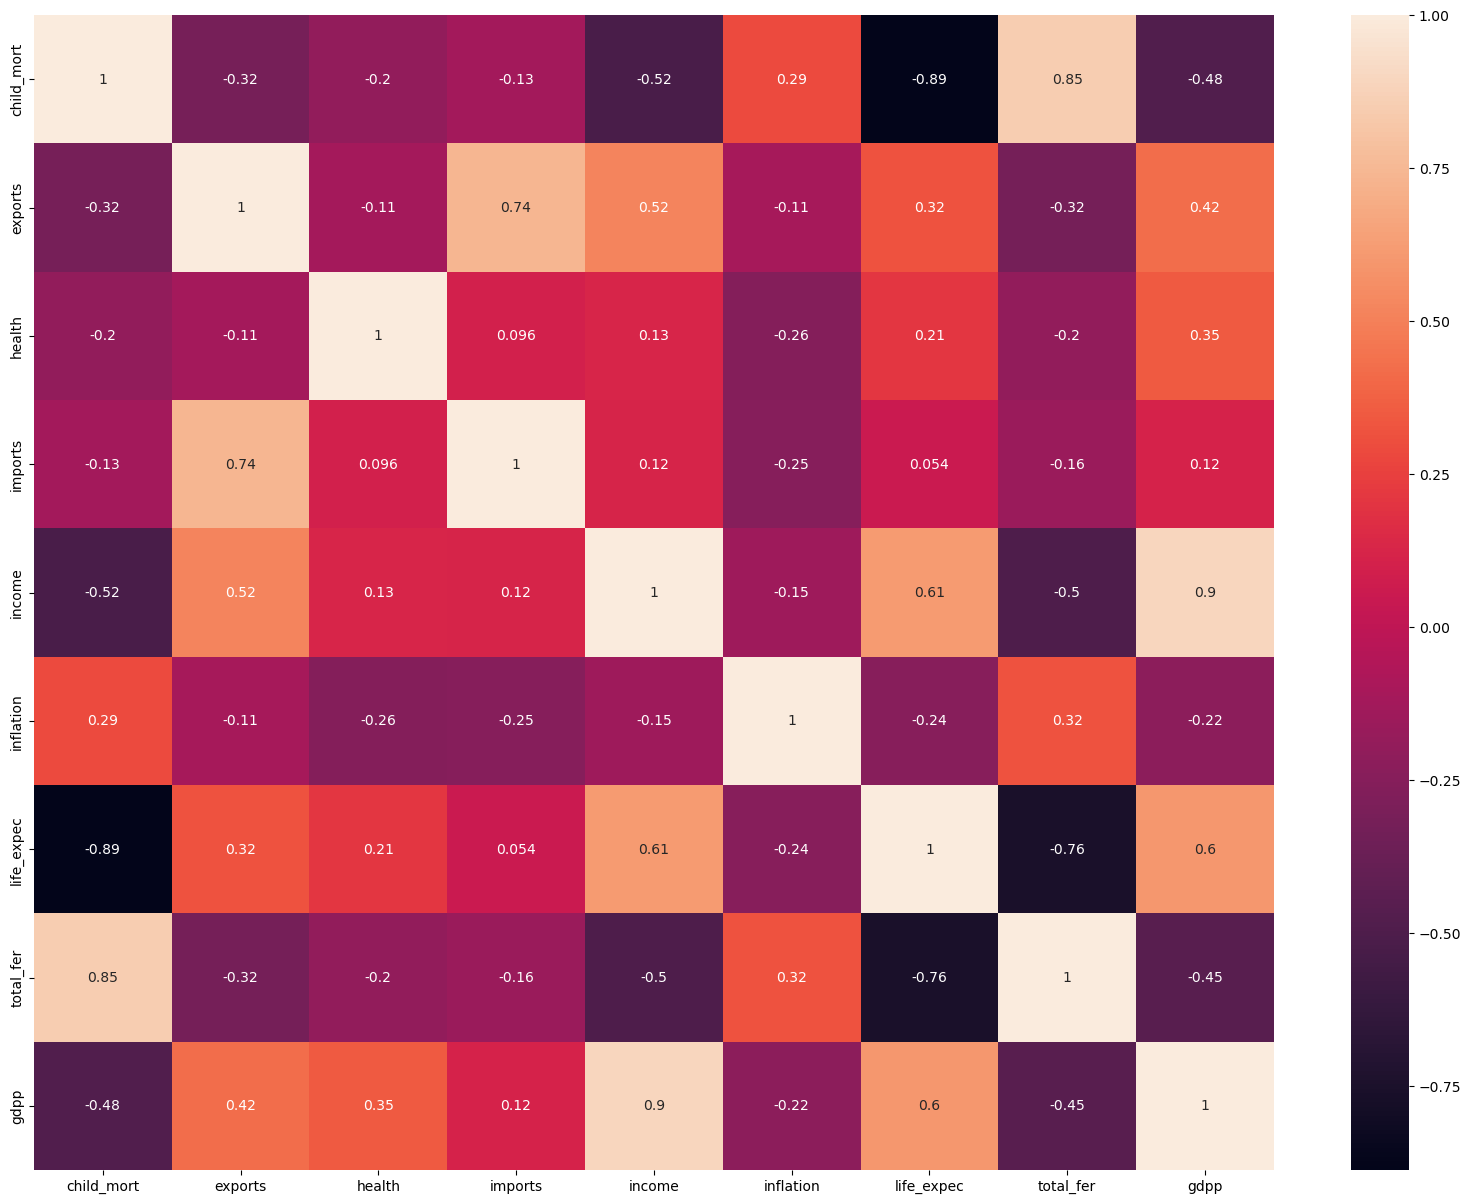

In [9]:
#обрахування кореляції (будь-який статистичний взаємозв'язок, причинний чи ні, між двома випадковими змінними або двовимірними даними)
plt.figure(figsize = (20,15))
sb.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='health', ylabel='Count'>

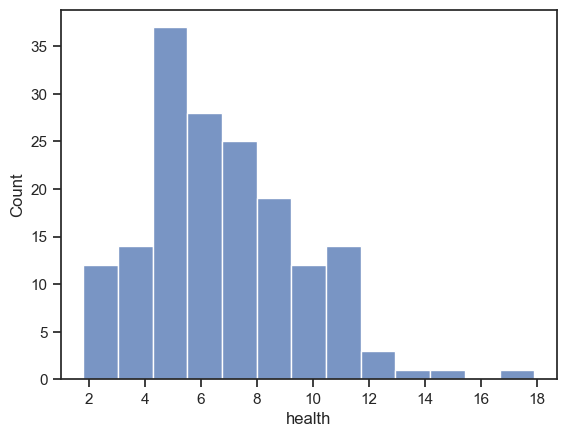

In [81]:
sb.histplot(x = data['health'])

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

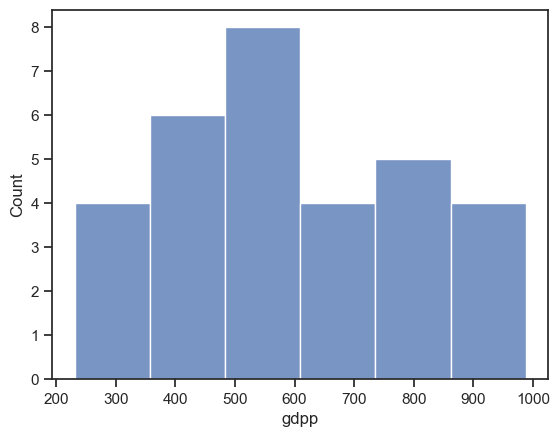

In [82]:
health_stat = data[data['gdpp'] < 1000]
sns.histplot(data=health_stat, x='gdpp')

<AxesSubplot:ylabel='inflation'>

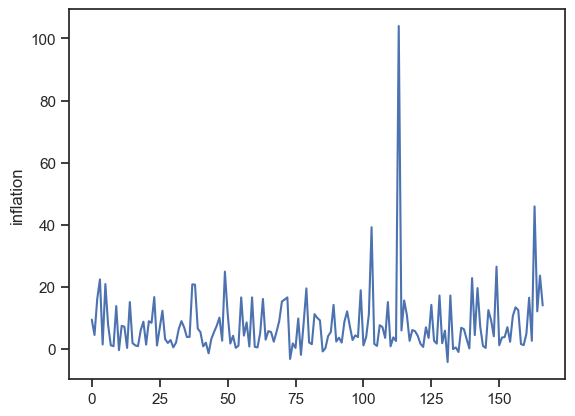

In [80]:
inf_data = data['inflation']
sb.lineplot(data = inf_data)

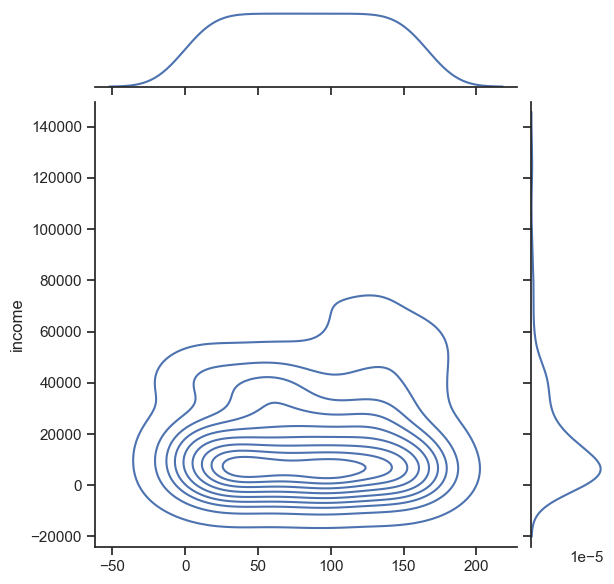

In [79]:
sb.set(style = "darkgrid")
sb.set_theme(style = "ticks")
sb.jointplot(data = data['income'], kind = 'kde')

<AxesSubplot:ylabel='exports'>

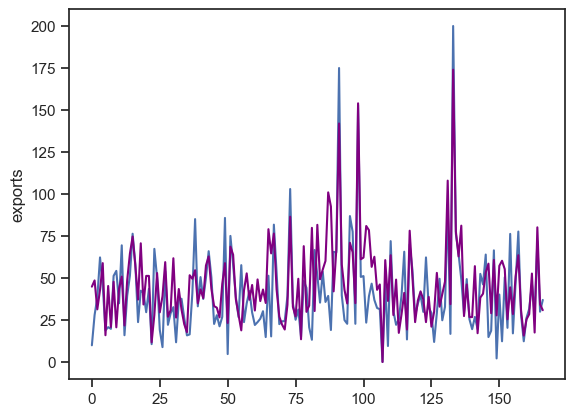

In [83]:
sb.lineplot(data = data['exports'])
sb.lineplot(data = data['imports'], color="purple")

<AxesSubplot:ylabel='total_fer'>

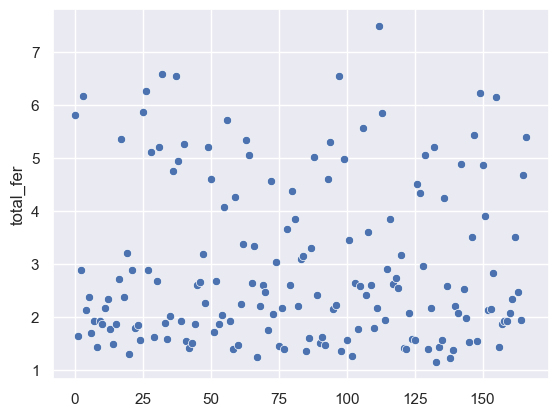

In [74]:
sb.scatterplot(data = data['total_fer'])

Двофакторний аналіз:

<AxesSubplot:xlabel='exports', ylabel='gdpp'>

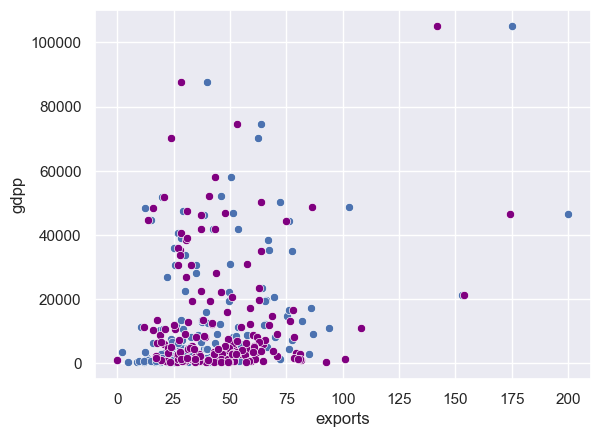

In [70]:
sb.set(style="darkgrid")
sb.scatterplot(data=data, x = data['exports'], y =data['gdpp'])
sb.scatterplot(data=data, x = data['imports'], y =data['gdpp'], color="purple")

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

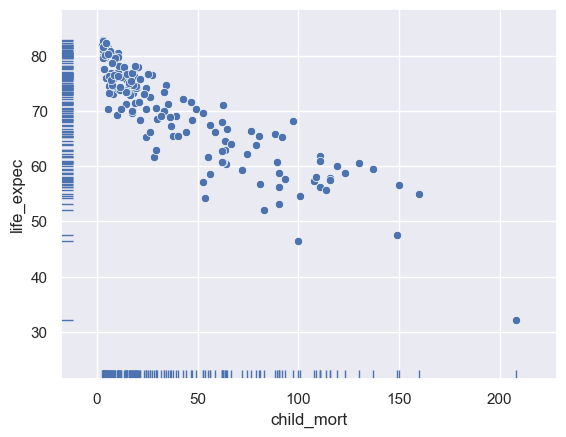

In [22]:
sb.scatterplot(data = data, x = "child_mort", y = "life_expec")
sb.rugplot(data = data, x = "child_mort", y = "life_expec")

<AxesSubplot:xlabel='health', ylabel='income'>

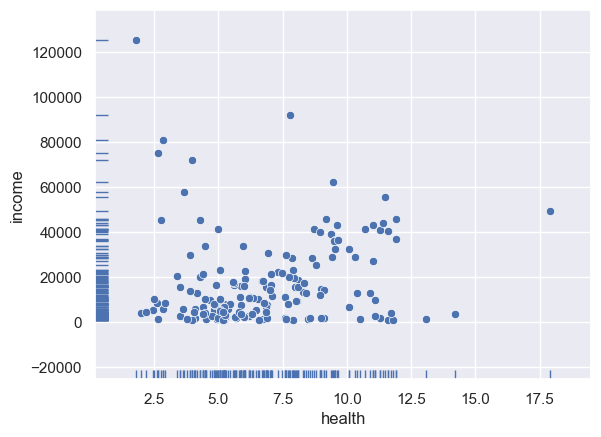

In [24]:
sb.scatterplot(data = data, x = "health", y = "income")
sb.rugplot(data = data, x = "health", y = "income")

<AxesSubplot:xlabel='health', ylabel='life_expec'>

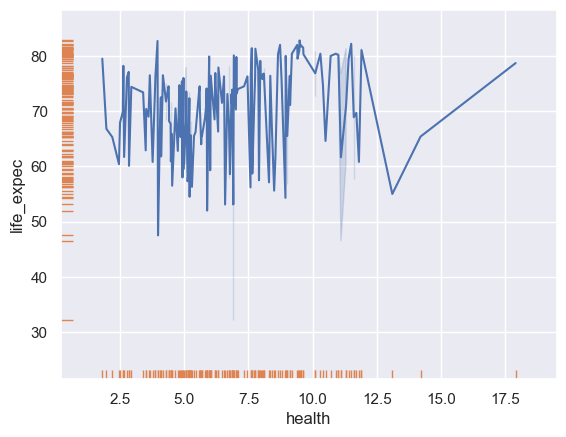

In [27]:
sb.lineplot(data = data, x = "health", y = "life_expec")
sb.rugplot(data = data, x = "health", y = "life_expec")

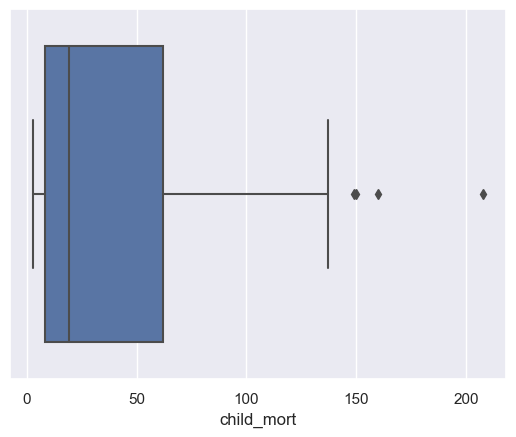

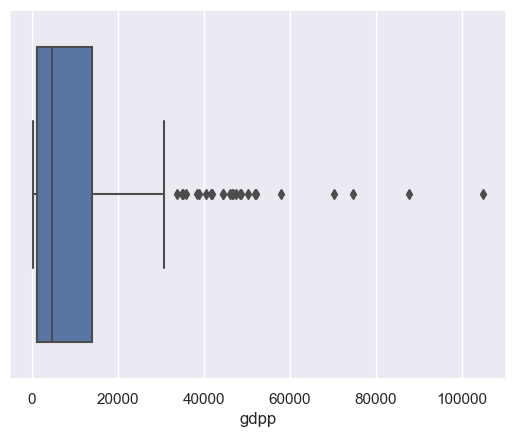

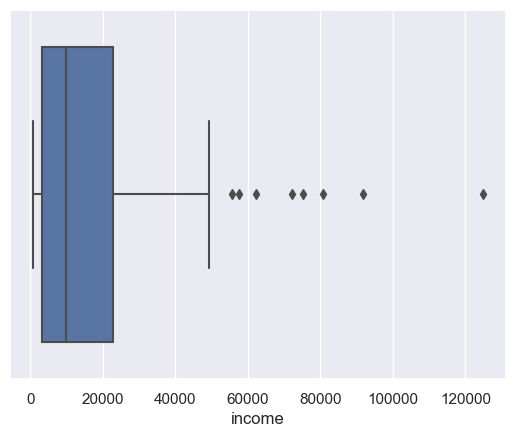

In [69]:
fig = plt.figure()
sb.boxplot(x = data['child_mort'])
plt.show()
sb.boxplot(x = data['gdpp'])
plt.show()
sb.boxplot(x = data['income'])
plt.show()

In [32]:
newdata = data[["country",'gdpp','child_mort','income']]
newdata = newdata[newdata['gdpp'] < 30000]
newdata = newdata[newdata['child_mort'] < 140]
newdata = newdata[newdata['income'] < 50000]
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     135 non-null    object 
 1   gdpp        135 non-null    int64  
 2   child_mort  135 non-null    float64
 3   income      135 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


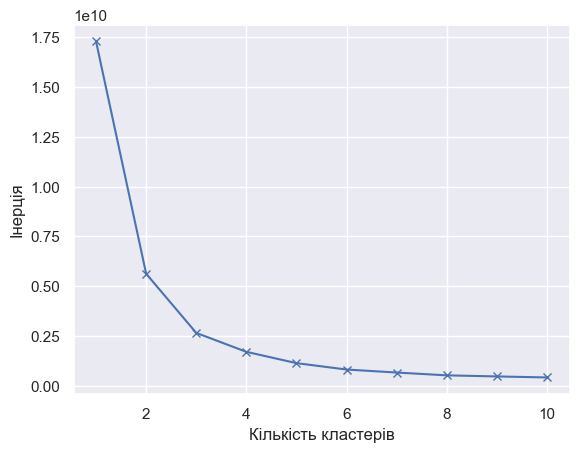

In [30]:
#кластеризація
import warnings
warnings.filterwarnings('ignore')
clust = list(zip(newdata["gdpp"], newdata["income"]))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clust)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='x')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()


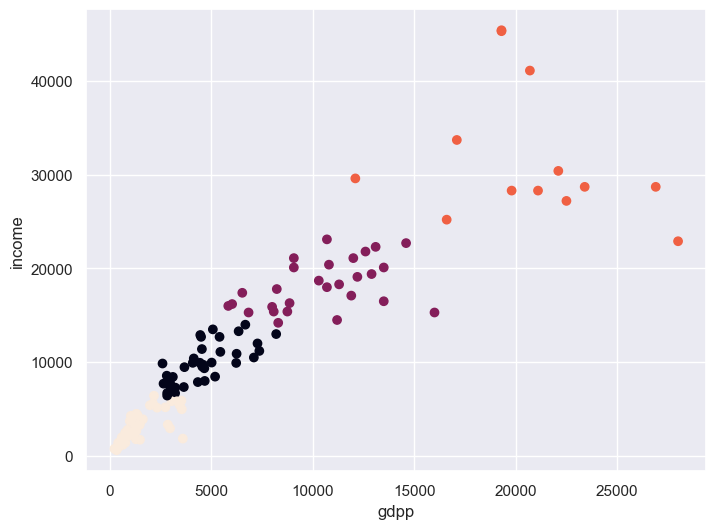

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(clust)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(newdata["gdpp"], newdata["income"], c=kmeans.labels_)
ax.set_xlabel('gdpp')
ax.set_ylabel('income')
plt.show()


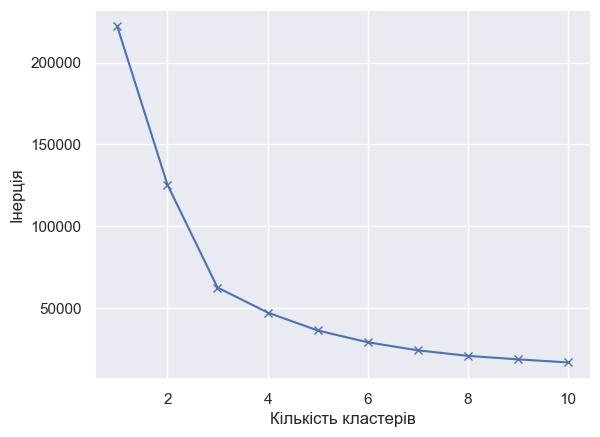

In [34]:
clust2 = list(zip(data["imports"], data["exports"]))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(clust2)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='x')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

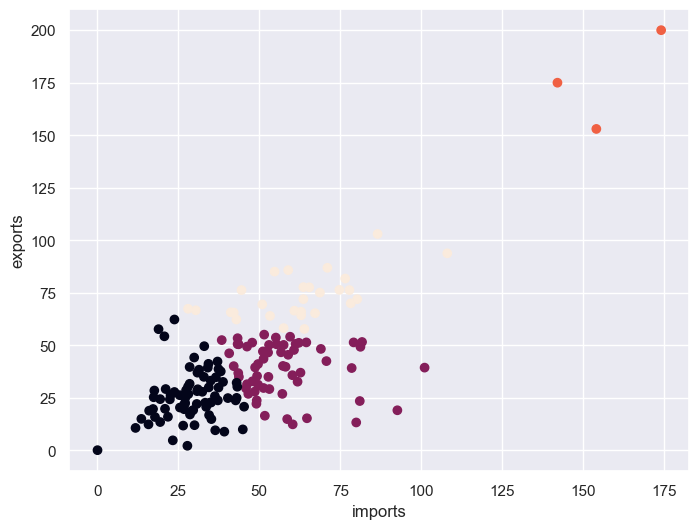

In [36]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(clust2)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(data["imports"], data["exports"], c=kmeans.labels_)
ax.set_xlabel('imports')
ax.set_ylabel('exports')
plt.show()

In [38]:
cl = data[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(cl)
cluster_labels = gmm_model.predict(cl)
cl = pd.DataFrame(cl)
cl['cluster'] = cluster_labels
cl

,child_mort,income,cluster
0,90.2,1610,1
1,16.6,9930,3
2,27.3,12900,3
3,119.0,5900,1
4,10.3,19100,3
...,...,...,...
162,29.2,2950,3
163,17.1,16500,3
164,23.3,4490,3
165,56.3,4480,1


Text(0.5, 0, 'income')

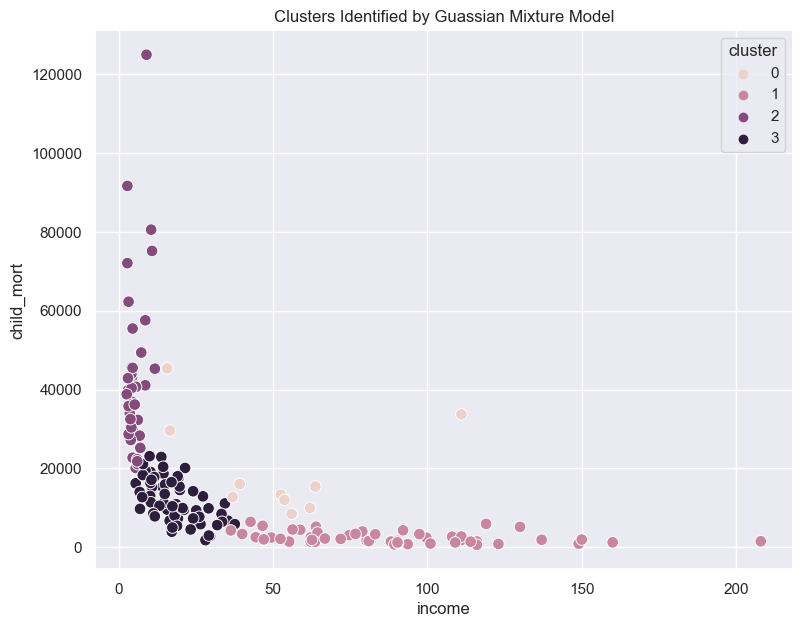

In [57]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=cl, hue='cluster', s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.ylabel('child_mort')
plt.xlabel('income')

In [61]:
dat = data[["country"]]
worst = pd.merge(dat,cl, left_index=True,right_index=True)
worst.nsmallest(10, ['income', 'child_mort'])

,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,1
88,Liberia,89.3,700,1
26,Burundi,93.6,764,1
112,Niger,123.0,814,1
31,Central African Republic,149.0,888,1
106,Mozambique,101.0,918,1
94,Malawi,90.5,1030,1
63,Guinea,109.0,1190,1
150,Togo,90.3,1210,1
132,Sierra Leone,160.0,1220,1


In [68]:
dat = data[["country"]]
best = pd.merge(dat, cl, left_index=True, right_index=True)
best.nlargest(10, ['income', 'child_mort'])

,country,child_mort,income,cluster
123,Qatar,9.0,125000,2
91,Luxembourg,2.8,91700,2
23,Brunei,10.5,80600,2
82,Kuwait,10.8,75200,2
133,Singapore,2.8,72100,2
114,Norway,3.2,62300,2
157,United Arab Emirates,8.6,57600,2
145,Switzerland,4.5,55500,2
159,United States,7.3,49400,2
73,Ireland,4.2,45700,2
